In [ ]:
"""Author: Melwyn D Souza, Reg No: R00209495"""

import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from keras.models import load_model
from sklearn.metrics import accuracy_score
import os

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!cd "gdrive/My Drive/A2"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	model0.hdf5  model1.hdf5  sample_data  weights.hdf5


In [ ]:
#copied over from assigment pdf appendix
def loadDataH5():  
    with h5py.File('gdrive/My Drive/A2/earth_data.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        # print (trainX.shape,trainY.shape)
        # print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [ ]:
def basemodel():
  input = keras.Input(shape=(64,64,3))
  conv1 = Conv2D(filters = 24, kernel_size = 4, activation = 'relu', padding = 'same')(input)
  pool1 = MaxPool2D(pool_size = 3, strides = 2)(conv1)
  conv2 = Conv2D(filters = 48, kernel_size = 3, activation = 'relu', padding = 'same')(pool1)
  pool2 = MaxPool2D(pool_size = 3, strides = 2)(conv2)
  conv3 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool2)
  pool3 = MaxPool2D(pool_size = 3, strides = 2)(conv3)
  conv4 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool3)
  pool4 = MaxPool2D(pool_size = 3, strides = 2)(conv4)
  conv5 = Conv2D(filters = 128, kernel_size = 3, activation = 'relu',padding = 'same')(pool4)
  pool5 = MaxPool2D(pool_size = 3, strides = 2)(conv5)
  flat1 = Flatten()(pool5)
  dense1 = Dense(256, activation='relu')(flat1)
  softmax = Dense(9, activation=tf.nn.softmax)(dense1)
  model = keras.Model(inputs=input, outputs=softmax)
  return model

In [ ]:
def model1():
  input = keras.Input(shape=(64,64,3))
  conv1 = Conv2D(filters = 24, kernel_size = 3, activation = 'relu', padding = 'same')(input)
  pool1 = MaxPool2D(pool_size = 3, strides = 2)(conv1)
  conv2 = Conv2D(filters = 48, kernel_size = 3, activation = 'relu', padding = 'same')(pool1)
  pool2 = MaxPool2D(pool_size = 3, strides = 2)(conv2)
  conv3 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool2)
  pool3 = MaxPool2D(pool_size = 3, strides = 2)(conv3)
  conv4 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool3)
  pool4 = MaxPool2D(pool_size = 3, strides = 2)(conv4)
  conv5 = Conv2D(filters = 80, kernel_size = 3, activation = 'relu',padding = 'same')(pool4)
  pool5 = MaxPool2D(pool_size = 2, strides = 2)(conv5)
  flat1 = Flatten()(pool5)
  dropout = Dropout(0.2)(flat1)
  dense1 = Dense(256, activation='relu')(dropout)
  softmax = Dense(9, activation=tf.nn.softmax)(dense1)
  model = keras.Model(inputs=input, outputs=softmax)
  return model

In [ ]:
def vgg():
  vggModel = tf.keras.applications.VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
  vggModel.trainable = False
  model = tf.keras.models.Sequential()
  model.add(vggModel)
  model.add(Flatten())
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(9, activation=tf.nn.softmax))
  # print(model.summary())
  return model

In [ ]:
def dataGennerator(images,labels):
      
    trainDataGen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.1,
                                                                    zoom_range=0.1,
                                                                    rotation_range=20,
                                                                    horizontal_flip=True, 
                                                                    width_shift_range=0.1,
                                                                    height_shift_range=0.1,
                                                                    fill_mode = 'reflect')
                                                                    
    trainGen = trainDataGen.flow(images, labels, batch_size = 32)
    
    return trainGen

In [ ]:
def imbalance(x,y):
  df = pd.DataFrame(y, columns = ['Labels'])
  fig = plt.figure(figsize=(5,3))
  ax1 = fig.add_subplot()
  df['Labels'].value_counts().plot(kind='bar', ax=ax1)
  ax1.set_ylabel('Class Label Count')
  ax1.set_title('Labels')
  plt.show()

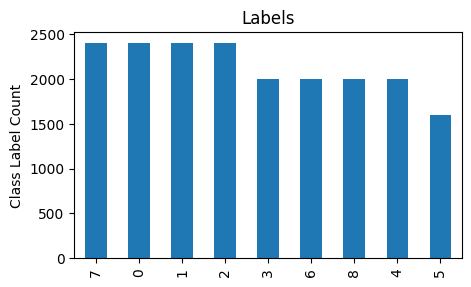

58900480/58889256 [==============================] - 1s 0us/step
MODEL 0 TRAINING
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 2.0491 - accuracy: 0.2059
Epoch 1: val_loss improved from inf to 1.82764, saving model to weights.hdf5
20/20 [==============================] - 7s 313ms/step - loss: 2.0491 - accuracy: 0.2059 - val_loss: 1.8276 - val_accuracy: 0.3613
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.5550 - accuracy: 0.4459
Epoch 2: val_loss improved from 1.82764 to 1.27015, saving model to weights.hdf5
20/20 [==============================] - 5s 263ms/step - loss: 1.5550 - accuracy: 0.4459 - val_loss: 1.2701 - val_accuracy: 0.5479
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.3092 - accuracy: 0.5010
Epoch 3: val_loss improved from 1.27015 to 1.23533, saving model to weights.hdf5
20/20 [==============================] - 6s 291ms/step - loss: 1.3092 - accuracy: 0.5010 - val_loss: 1.2353 - val_accuracy: 0.5365
Epoc

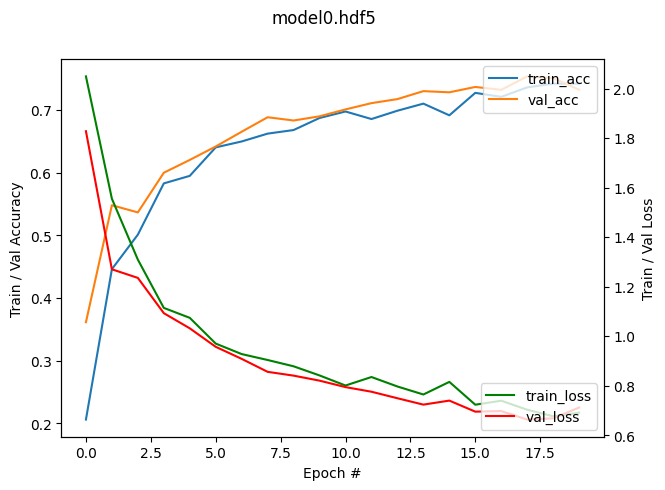

MODEL 1 TRAINING
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 2.0521 - accuracy: 0.1992
Epoch 1: val_loss improved from inf to 1.84804, saving model to weights.hdf5
20/20 [==============================] - 7s 318ms/step - loss: 2.0521 - accuracy: 0.1992 - val_loss: 1.8480 - val_accuracy: 0.4340
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.5529 - accuracy: 0.4409
Epoch 2: val_loss improved from 1.84804 to 1.31967, saving model to weights.hdf5
20/20 [==============================] - 5s 266ms/step - loss: 1.5529 - accuracy: 0.4409 - val_loss: 1.3197 - val_accuracy: 0.4710
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.2263 - accuracy: 0.5108
Epoch 3: val_loss improved from 1.31967 to 1.17167, saving model to weights.hdf5
20/20 [==============================] - 5s 265ms/step - loss: 1.2263 - accuracy: 0.5108 - val_loss: 1.1717 - val_accuracy: 0.5269
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 1

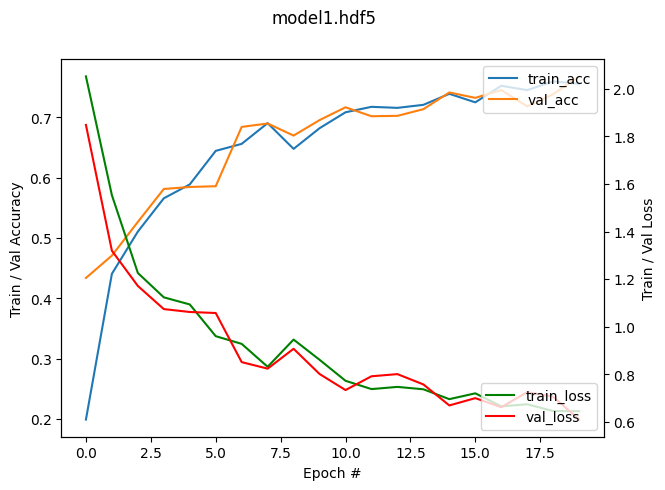

MODEL 2 TRAINING
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1.9935 - accuracy: 0.2305
Epoch 1: val_loss improved from inf to 1.65542, saving model to weights.hdf5
20/20 [==============================] - 6s 278ms/step - loss: 1.9935 - accuracy: 0.2305 - val_loss: 1.6554 - val_accuracy: 0.3696
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.4840 - accuracy: 0.4316
Epoch 2: val_loss improved from 1.65542 to 1.26973, saving model to weights.hdf5
20/20 [==============================] - 5s 254ms/step - loss: 1.4840 - accuracy: 0.4316 - val_loss: 1.2697 - val_accuracy: 0.5088
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.3074 - accuracy: 0.4868
Epoch 3: val_loss improved from 1.26973 to 1.19046, saving model to weights.hdf5
20/20 [==============================] - 5s 257ms/step - loss: 1.3074 - accuracy: 0.4868 - val_loss: 1.1905 - val_accuracy: 0.5394
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 1

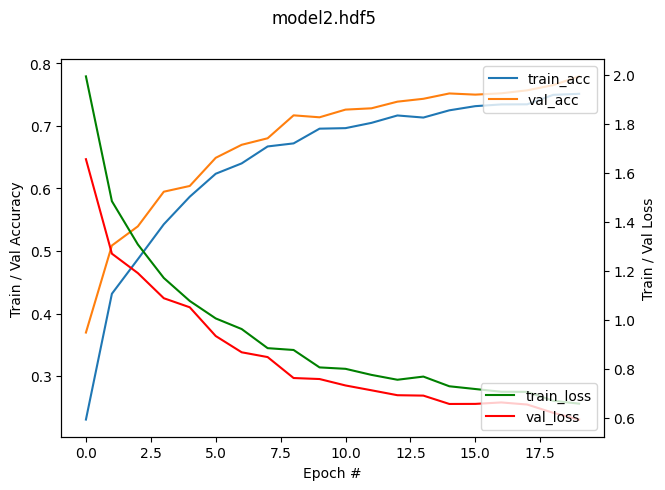

MODEL 3 TRAINING
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 2.0582 - accuracy: 0.1940
Epoch 1: val_loss improved from inf to 1.85834, saving model to weights.hdf5
20/20 [==============================] - 7s 306ms/step - loss: 2.0582 - accuracy: 0.1940 - val_loss: 1.8583 - val_accuracy: 0.3619
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 1.5778 - accuracy: 0.4075
Epoch 2: val_loss improved from 1.85834 to 1.31130, saving model to weights.hdf5
20/20 [==============================] - 5s 254ms/step - loss: 1.5778 - accuracy: 0.4075 - val_loss: 1.3113 - val_accuracy: 0.4808
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 1.2759 - accuracy: 0.4842
Epoch 3: val_loss improved from 1.31130 to 1.16751, saving model to weights.hdf5
20/20 [==============================] - 6s 285ms/step - loss: 1.2759 - accuracy: 0.4842 - val_loss: 1.1675 - val_accuracy: 0.5231
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 1

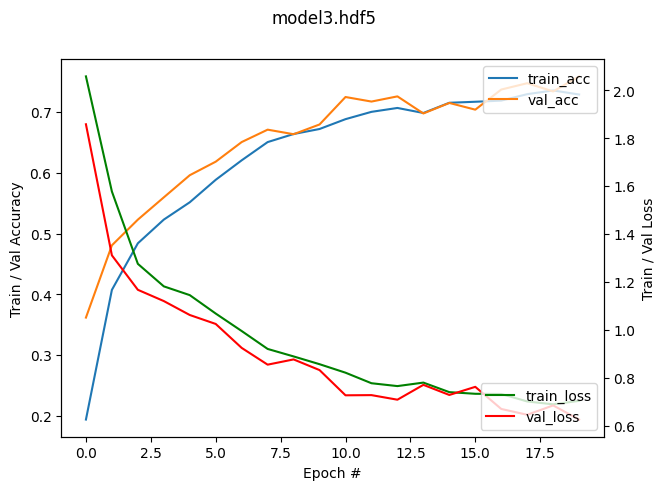

MODEL 4 TRAINING
Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 1.2342 - accuracy: 0.5761
Epoch 1: val_loss improved from inf to 0.73989, saving model to weights.hdf5
20/20 [==============================] - 35s 1s/step - loss: 1.2342 - accuracy: 0.5761 - val_loss: 0.7399 - val_accuracy: 0.7523
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.6684 - accuracy: 0.7683
Epoch 2: val_loss improved from 0.73989 to 0.59736, saving model to weights.hdf5
20/20 [==============================] - 20s 1s/step - loss: 0.6684 - accuracy: 0.7683 - val_loss: 0.5974 - val_accuracy: 0.7985
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.5591 - accuracy: 0.8056
Epoch 3: val_loss improved from 0.59736 to 0.53261, saving model to weights.hdf5
20/20 [==============================] - 20s 1s/step - loss: 0.5591 - accuracy: 0.8056 - val_loss: 0.5326 - val_accuracy: 0.8221
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 0.5031 

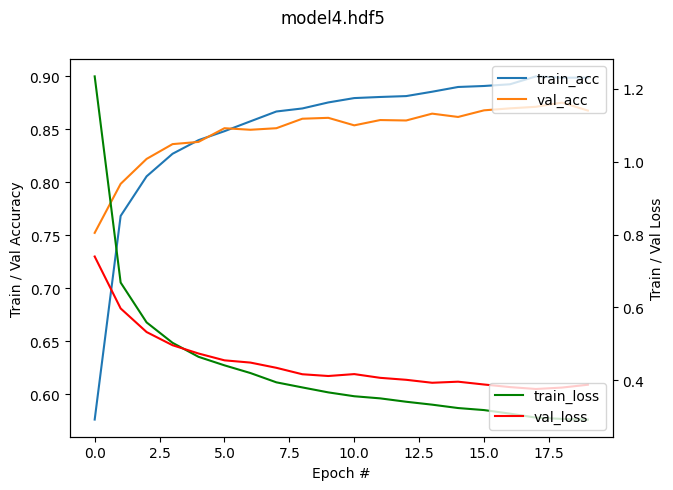

Accuracy of model = model0.hdf5 is 0.7535416666666667
Accuracy of model = model1.hdf5 is 0.768125
Accuracy of model = model2.hdf5 is 0.7791666666666667
Accuracy of model = model3.hdf5 is 0.7589583333333333
Accuracy of model = model4.hdf5 is 0.87125
Accuracy Score for Ensemble is 0.8410416666666667


In [ ]:
def main():
  
  dataAug = True #st to flase to disable data augmentation
  tr_x, tr_y, val_x, val_y = loadDataH5()
  imbalance(tr_x, tr_y)
  tr_x, val_x = tr_x/255, val_x/255 #Normalize data
  epocs = 20 #epochs 
  batchsize = 32

  #five models to test
  mainmodels = [basemodel(), basemodel(), model1(), model1(), vgg()]
  modelnames = []

  for i in range(len(mainmodels)):
    print("MODEL {} TRAINING".format(i))
    model = mainmodels[i]
    
    fname = 'weights.hdf5'
    # os.path.isfile(fname)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor='val_loss',
                                                    mode='min', save_best_only=True, verbose=1)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    if dataAug == True:
      print("Data Augmenting")
      augmentedData = dataGennerator(tr_x, tr_y)  
      history = model.fit(augmentedData, epochs=epocs, validation_data=(val_x, val_y), steps_per_epoch = 20, callbacks = [checkpoint])
    else:
      history = model.fit(tr_x, tr_y, epochs=epocs,  validation_data=(val_x, val_y), steps_per_epoch = 20, callbacks = [checkpoint])
    
    model.load_weights(fname)
    saveName = 'model'+str(i)+'.hdf5'
    modelnames.append(saveName)
    model.save(saveName)

    fig = plt.figure(figsize=(7,5))
    fig.suptitle(saveName)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
  
    ax2.plot(np.arange(0, epocs), history.history["loss"], color='green', label="train_loss")
    ax2.plot(np.arange(0, epocs), history.history["val_loss"], color='red', label="val_loss")
    ax1.plot(np.arange(0, epocs), history.history["accuracy"], label="train_acc")
    ax1.plot(np.arange(0, epocs), history.history["val_accuracy"], label="val_acc")
    ax1.set_ylabel("Train / Val Accuracy")
    ax2.set_ylabel("Train / Val Loss")
    ax1.set_xlabel("Epoch #")
    ax1.legend(loc ='upper right')
    ax2.legend(loc= 'lower right')
    plt.show()


  models = []
  for Model in modelnames:
    m = load_model(Model)
    models.append(m)
    prediction = m.predict(val_x)
    prediction = np.argmax(prediction, axis=1)
    accuracy = accuracy_score(val_y, prediction)
    print('Accuracy of model = {} is {}'.format(Model,accuracy))

  preds = [model.predict(val_x) for model in models]
  preds = np.array(preds)
  avg = np.divide(np.sum(preds, axis=0), 9)
  ensPred = np.argmax(avg, axis=1)
  ensAcc= accuracy_score(val_y, ensPred)
  print('Accuracy Score for Ensemble is {}'.format(ensAcc))

main() 